> # Chapter 12. Comparing Two Samples
---



### 1. A/B Testing 


### 2.  Causality 




In [1]:
# HIDDEN
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(threshold=50)
fpath='https://raw.githubusercontent.com/data-8/textbook/878363106db4313de925a709b1617d6f328c56a1/assets/data/'

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


+ 앞 장에서는 하나의 sample 그룹을 생성하여 관찰값과 비교
+ 이 장에서는 두개의 sample 그룹에 대해 상호비교하는 응용문제를 다룬다.

> A/B Testing 
+ 어떤 두 그룹이 같은 분포로부터 샘플링 된 것인지를 판단
+ 산모흡연과 아기발육에 관한 다음 데이터를 가지고 연습해 보자.(A/B는 산모의 흡연 여부)

In [2]:
baby = Table.read_table(fpath+'baby.csv') # 아기와 산모에 관한 data
baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [3]:
smoking_and_birthweight = baby.select('Maternal Smoker', 'Birth Weight')

In [4]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


Note)
+ Overlaid histogram 도 다음과 같이 가능하다.

In [5]:
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140


/usr/local/lib/python3.7/dist-packages/datascience/tables.py:483: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to

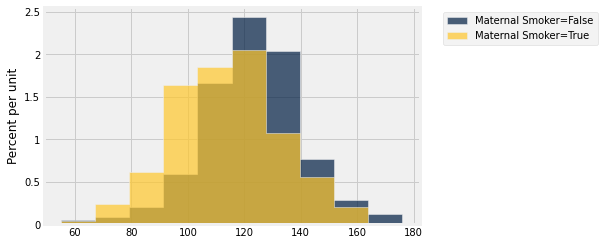

In [6]:
smoking_and_birthweight.hist('Birth Weight', group = 'Maternal Smoker') # group을 이용하여 두 그룹의 차이를 보여줌
# 아래의 결과가 우연인지 아닌지가 중요.

+ 흡연여성의 경우 아기의 몸무게가 비교적 작아 보인다.
+ 이것이 우연에 의한 것인지를 살펴보자.

+ Null hypothesis
  - 두 그룹(흡연모, 비흡연모)의 분포는 같다. 즉, 둘의 차이는 랜덤선택에 의한 우연이다.
+ Alternative hypothesis: 
  - 흡연모의 아기 몸무게는 비흡연모의 아기 몸무게보다 작다.

+ Test Statistic
  - 두 그룹사이의 평균 몸무게 차이
  - 여기에서는 (흡연모그룹 아기 몸무게 - 비흡연모그룹 아기 몸무게) 를 사용

+ Observed statistic을 먼저 계산해보자.

In [7]:
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [8]:
means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

-9.266142572024918

+ 이제 Null hypothesis 에서의 statistic을 구해보자.
  - shuffle을 하면 되는데, sample()함수에서 sample_size를 주지 않으면 된다.
  - shuffle 이후 statistic을 계산하면 된다.

In [9]:
# shuffling 구현 코드
shuffled_weights = smoking_and_birthweight.sample(with_replacement = False).column(1)
original_and_shuffled = smoking_and_birthweight.with_column('Shuffled Birth Weight', shuffled_weights)
original_and_shuffled # shuffling은 섞어버리는 것 -> 순서가 random하게 바뀜.
# shuffling을 통해 새로운 permutation을 만들었다. ** permutation(순열)의 개수 = N!

Maternal Smoker,Birth Weight,Shuffled Birth Weight
False,120,114
False,113,136
True,128,151
True,108,135
False,136,123
False,138,85
False,132,126
False,120,139
True,143,123
False,140,119


In [10]:
all_group_means = original_and_shuffled.group('Maternal Smoker', np.average)
all_group_means

Maternal Smoker,Birth Weight average,Shuffled Birth Weight average
False,123.085,119.576
True,113.819,119.285


In [11]:
shuffled_means = original_and_shuffled.group('Maternal Smoker', np.average).column(2)
difference = shuffled_means.item(1) - shuffled_means.item(0)
difference

-0.2908207261148448

이를 토대로 시뮬레이션 코드를 작성해 보자.

In [12]:
differences = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    
    shuffled_weights = smoking_and_birthweight.sample(with_replacement = False).column(1)
    original_and_shuffled = smoking_and_birthweight.with_column('Shuffled Birth Weight', shuffled_weights)

    shuffled_means = original_and_shuffled.group('Maternal Smoker', np.average).column(2)
    simulated_difference = shuffled_means.item(1) - shuffled_means.item(0)
    
    differences = np.append(differences, simulated_difference)
    


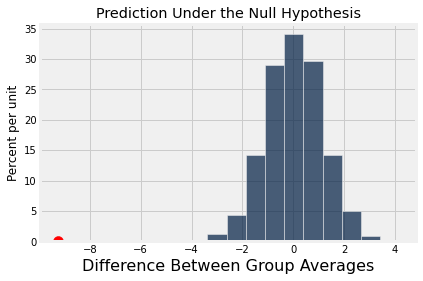

In [13]:
# 기무 가설을 채택할 근거가 없음을 증명
Table().with_column('Difference Between Group Averages', differences).hist()
plots.title('Prediction Under the Null Hypothesis');
plots.scatter(observed_difference, 0, color='red', s=100); # 실제값과 비교를 위해

In [14]:
empirical_P = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_P

0.0

- 따라서 null hypothesis가 reject된다.
- 즉, 두 그룹의 분포는 같다고 할 수 없다.

- 위 과정을 일반화하여 다른 데이터에 대해서도 사용하자.

In [15]:
def permuted_sample_average_difference(table, label, group_label, repetitions):
    
    tbl = table.select(group_label, label)
    
    differences = make_array()
    for i in np.arange(repetitions):
        shuffled = tbl.sample(with_replacement = False).column(1)
        original_and_shuffled = tbl.with_column('Shuffled Data', shuffled)

        shuffled_means = original_and_shuffled.group(group_label, np.average).column(2)
        simulated_difference = shuffled_means.item(1) - shuffled_means.item(0)
    
        differences = np.append(differences, simulated_difference)
    
    return differences   


- 간단하게 같은 데이터를 가지고 다음 가설을 테스트해 보자.
- Null Hypothesis
  - 흡연모와 비흡연모 사이에 나이에 관한 분포는 다르지 않다.

- Observed statistic

In [16]:
smoking_and_age = baby.select('Maternal Smoker', 'Maternal Age')
observed_means = smoking_and_age.group('Maternal Smoker', np.average).column(1)
observed_means # (비흡연자 나이, 흡연자 나이)

array([27.54405594, 26.73638344])

In [17]:
observed_difference = observed_means.item(1) - observed_means.item(0)
observed_difference

-0.8076725017901509

+ Simulated statistics by shuffling

In [18]:
differences = permuted_sample_average_difference(baby, 'Maternal Age', 'Maternal Smoker', 5000)

Text(0.5, 1.0, 'Prediction Under the Null Hypothesis')

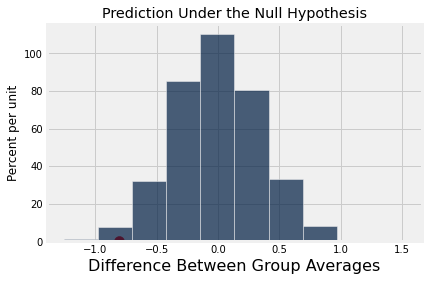

In [19]:
Table().with_column('Difference Between Group Averages', differences).hist()
plots.scatter(observed_difference, 0, color='red', s=100)
plots.title('Prediction Under the Null Hypothesis')

In [20]:
empirical_P = np.count_nonzero(differences <= observed_difference) / 5000
empirical_P

0.0102

> Deflategate 
---
+ 2015년 미 미식축구결승에서 Indianapolis Colts와 New England Patriots가 경기
+ 공의 압력은 [12.5 psi, 13.5 psi]이 정상
+ 경기 시작전 측정한 공의 압력
 - Colts 소유공 : 대부분 13.0 psi
 - Patriots 소유공 : 대부분 12.5 psi
+ Half-time에 두 명의 심판관(Clete Blakeman , Dyrol Prioleau) 이 다시 측정 
+ Patriots 공이 바람이 지나치게 빠졌다고 주장

In [21]:
football = Table.read_table(fpath+'deflategate.csv')
football.show()

Team,Blakeman,Prioleau
Patriots,11.5,11.8
Patriots,10.85,11.2
Patriots,11.15,11.5
Patriots,10.7,11
Patriots,11.1,11.45
Patriots,11.6,11.95
Patriots,11.85,12.3
Patriots,11.1,11.55
Patriots,10.95,11.35
Patriots,10.5,10.9


- 두 심판관이 측정한 값의 평균을 사용하자.

In [22]:
football = football.with_column(
    'Combined', (football.column(1)+football.column(2))/2
    ).drop(1, 2)
football.show()

Team,Combined
Patriots,11.65
Patriots,11.025
Patriots,11.325
Patriots,10.85
Patriots,11.275
Patriots,11.775
Patriots,12.075
Patriots,11.325
Patriots,11.15
Patriots,10.7


+ 경기 시작 때 공의 압력에서 얼마가 줄어들었는지를 계산하자.

In [23]:
patriots_start = 12.5 * np.ones(11)
colts_start = 13 * np.ones(4)
start = np.append(patriots_start, colts_start)
start

array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
       13. , 13. , 13. , 13. ])

In [24]:
drop = start - football.column('Combined')
football = football.with_column('Pressure Drop', drop)
football.show()

Team,Combined,Pressure Drop
Patriots,11.65,0.85
Patriots,11.025,1.475
Patriots,11.325,1.175
Patriots,10.85,1.65
Patriots,11.275,1.225
Patriots,11.775,0.725
Patriots,12.075,0.425
Patriots,11.325,1.175
Patriots,11.15,1.35
Patriots,10.7,1.8


+ Observed statistic

In [25]:
football = football.drop('Combined')
football.group('Team', np.average)

Team,Pressure Drop average
Colts,0.46875
Patriots,1.20227


In [26]:
observed_means = football.group('Team', np.average).column(1)

observed_difference = observed_means.item(1) - observed_means.item(0)
observed_difference

0.733522727272728

- Simulated statistics

In [27]:
def permuted_sample_average_difference(table, label, group_label, repetitions): # table, x축, 기준 group, 반복 횟수
    
    tbl = table.select(group_label, label)
    
    differences = make_array()
    for i in np.arange(repetitions):
        shuffled = tbl.sample(with_replacement = False).column(1) # with_replacement = False == 중복 x
        original_and_shuffled = tbl.with_column('Shuffled Data', shuffled)

        shuffled_means = original_and_shuffled.group(group_label, np.average).column(2)
        simulated_difference = shuffled_means.item(1) - shuffled_means.item(0)
    
        differences = np.append(differences, simulated_difference)
    
    return differences   
# p - value 란 대립 가설이 만족하여 귀무 가설이 무시될 때, 그럼에도 불구하고 귀무가설 처럼 되어버리는 상황이 나올 확률로 면적 구하면 됨.
# one-side 검정 -> ~이 너무 크거나 작은 것이 아닌가? ( 대립 가설 중 One-side ), 이때 p-value는 중앙으로부터 반대 방향으로 넓이 구하기
# two-side 검정 -> 중앙으로부터 너무 크거나 작은 부분의 넓이 구함
# p-value 는 대립 가설의 의미에 맞춰서 구하는 것.
# 빨간 점이 우측에 있다고 무조건 우측 넓이를 구하는 것 아님. 이 방향은 대립 가설에 의해 결정되는 것
# 예를 들어, A가 더 크다라는 대립가설이 존재하는데, 귀무가설이 B쪽에 형성되면, A의 우측 넓이를 구함.
# 귀무가설, 대립가설, p-value 개념 확실히 하기
# 귀무가설은 값 두개가 비슷할 것이다.

In [28]:
differences = permuted_sample_average_difference(football, 'Pressure Drop', 'Team', 10000)

Text(0.5, 1.0, 'Prediction Under the Null Hypothesis')

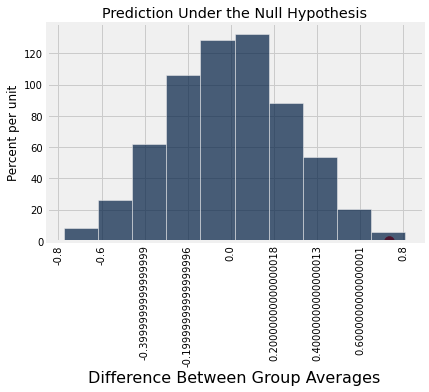

In [35]:
Table().with_column('Difference Between Group Averages', differences).hist()
plots.scatter(observed_difference, 0, color='red', s=100)
plots.title('Prediction Under the Null Hypothesis')


In [30]:
empirical_P = np.count_nonzero(differences >= observed_difference) / 10000
empirical_P

0.0029

> ### Recap
---

+ A/B Testing
 - 두 그룹의 분포에 대한 비교
 - shuffle